# **TK98232 -emotion classification from text using machine learning**

# **Import Statements**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# **Read The Dataset**

In [2]:
df = pd.read_csv("training.csv")

In [3]:
df.head()

text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

In [4]:
df.tail()

text  label
15995  i just had a very brief time in the beanbag an...      0
15996  i am now turning and i feel pathetic that i am...      0
15997                     i feel strong and good overall      1
15998  i feel like this was such a rude comment and i...      3
15999  i know a lot but i feel so stupid because i ca...      0

# **Information about Dataset**

In [5]:
#shape oh the dataset
df.shape

(16000, 2)

In [6]:
#check The info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [7]:
#check The null value
df.isnull().sum()

text     0
label    0
dtype: int64

In [8]:
#check The Duplicate values
df.duplicated().T

0        False
1        False
2        False
3        False
4        False
         ...  
15995    False
15996    False
15997    False
15998    False
15999    False
Length: 16000, dtype: bool

In [9]:
#Describe The Data
df.describe().T

count      mean      std  min  25%  50%  75%  max
label  16000.0  1.565937  1.50143  0.0  0.0  1.0  3.0  5.0

In [10]:
df.describe()

label
count  16000.000000
mean       1.565937
std        1.501430
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        5.000000

In [11]:
df['label'].value_counts()

1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: label, dtype: int64

## **EDA**

<Axes: xlabel='label', ylabel='Count'>

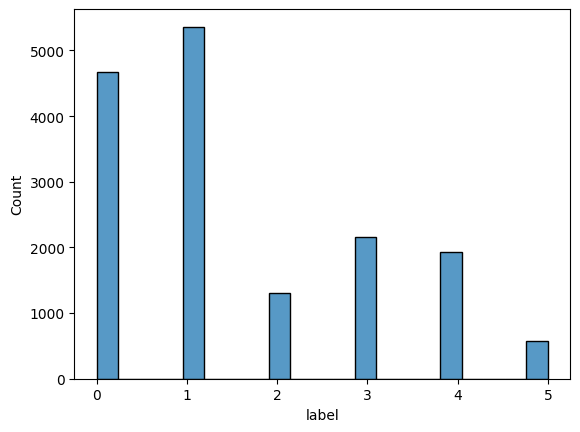

In [12]:
sns.histplot(df['label'])

<Axes: xlabel='label', ylabel='Density'>

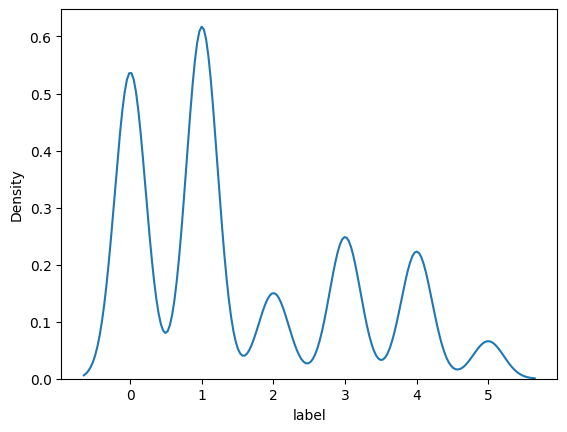

In [13]:
sns.kdeplot(df['label'])

<Axes: ylabel='label'>

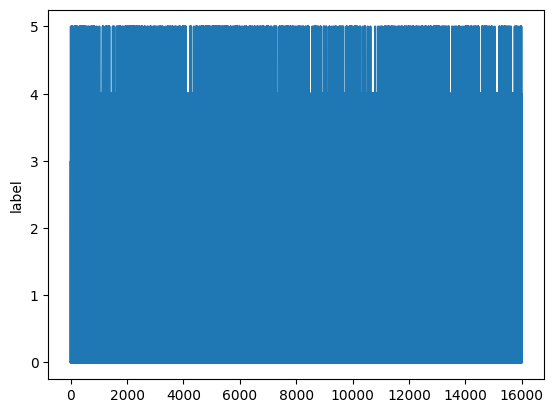

In [14]:
sns.lineplot(df['label'])

<Axes: ylabel='label'>

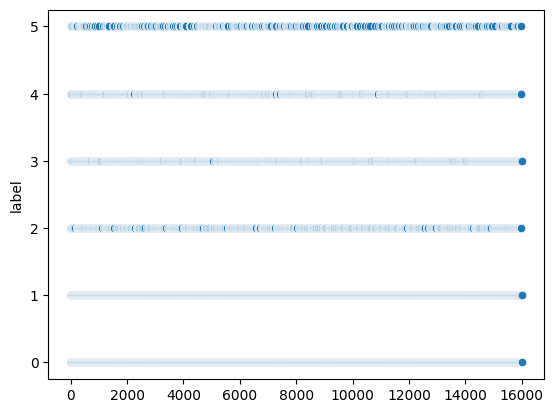

In [15]:
sns.scatterplot(df['label'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [17]:
import plotly.express as px
from plotly import graph_objects as go

In [18]:
fig = px.histogram(df, x='label', template='plotly_white', title='text')
fig.update_xaxes(categoryorder='category descending', title='label').update_yaxes(title='text')
fig.show()

In [19]:
fig = px.histogram(df, x='text', template='plotly_white', title='label')
fig.update_xaxes(categoryorder='category descending', title='text').update_yaxes(title='text')
fig.show()

In [20]:
fig = px.bar(df[:20], x='text', y='label', title='text', template='plotly_white', labels={'ngram': 'Bigram', 'count': 'Count'})
fig.show()

In [21]:
fig = px.bar(df[:20], x='label', y='text', title='label', template='plotly_white', labels={'ngram': 'Bigram', 'count': 'Count'})
fig.show()

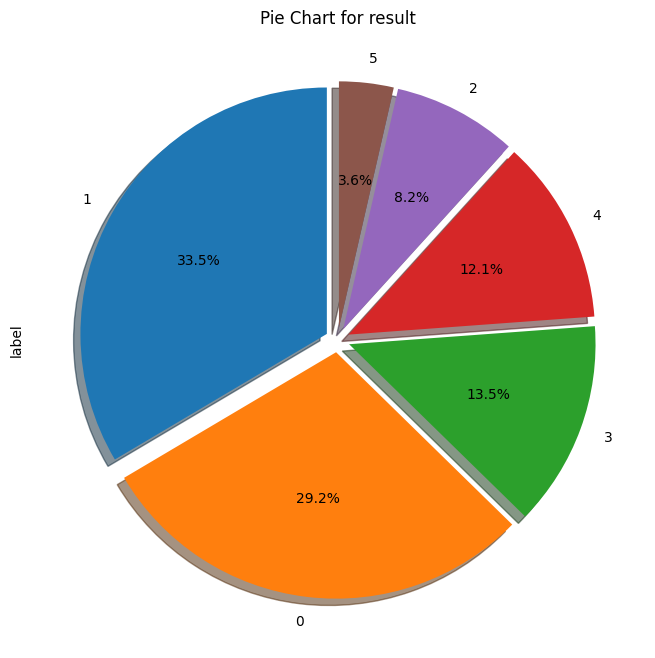

In [22]:
df['label'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for result')
plt.show()

# **Preprocessing**

In [23]:
x = df.drop('label',axis=1)
y = df["label"]

In [24]:
x.shape

(16000, 1)

In [25]:
y.shape

(16000,)

In [26]:
messages=x.copy()

In [27]:
messages['text'][1]

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

In [28]:
messages.head()

text
0                            i didnt feel humiliated
1  i can go from feeling so hopeless to so damned...
2   im grabbing a minute to post i feel greedy wrong
3  i am ever feeling nostalgic about the fireplac...
4                               i am feeling grouchy

In [29]:
messages.reset_index(inplace=True)

In [30]:
messages.head()

index                                               text
0      0                            i didnt feel humiliated
1      1  i can go from feeling so hopeless to so damned...
2      2   im grabbing a minute to post i feel greedy wrong
3      3  i am ever feeling nostalgic about the fireplac...
4      4                               i am feeling grouchy

In [31]:
#apply the nltk
import nltk
import re
from nltk.corpus import stopwords

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ymts0630\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
len(messages)

16000

In [34]:
stop=set(stopwords.words('english'))

In [35]:
corpus=[]
new= df['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [36]:
corpus

['i',
 'didnt',
 'feel',
 'humiliated',
 'i',
 'can',
 'go',
 'from',
 'feeling',
 'so',
 'hopeless',
 'to',
 'so',
 'damned',
 'hopeful',
 'just',
 'from',
 'being',
 'around',
 'someone',
 'who',
 'cares',
 'and',
 'is',
 'awake',
 'im',
 'grabbing',
 'a',
 'minute',
 'to',
 'post',
 'i',
 'feel',
 'greedy',
 'wrong',
 'i',
 'am',
 'ever',
 'feeling',
 'nostalgic',
 'about',
 'the',
 'fireplace',
 'i',
 'will',
 'know',
 'that',
 'it',
 'is',
 'still',
 'on',
 'the',
 'property',
 'i',
 'am',
 'feeling',
 'grouchy',
 'ive',
 'been',
 'feeling',
 'a',
 'little',
 'burdened',
 'lately',
 'wasnt',
 'sure',
 'why',
 'that',
 'was',
 'ive',
 'been',
 'taking',
 'or',
 'milligrams',
 'or',
 'times',
 'recommended',
 'amount',
 'and',
 'ive',
 'fallen',
 'asleep',
 'a',
 'lot',
 'faster',
 'but',
 'i',
 'also',
 'feel',
 'like',
 'so',
 'funny',
 'i',
 'feel',
 'as',
 'confused',
 'about',
 'life',
 'as',
 'a',
 'teenager',
 'or',
 'as',
 'jaded',
 'as',
 'a',
 'year',
 'old',
 'man',
 'i',

In [37]:
from nltk.stem.porter import PorterStemmer ##stemming purpose
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    
    corpus.append(review)

In [38]:
corpus

['didnt feel humili',
 'go feel hopeless damn hope around someon care awak',
 'im grab minut post feel greedi wrong',
 'ever feel nostalg fireplac know still properti',
 'feel grouchi',
 'ive feel littl burden late wasnt sure',
 'ive take milligram time recommend amount ive fallen asleep lot faster also feel like funni',
 'feel confus life teenag jade year old man',
 'petrona year feel petrona perform well made huge profit',
 'feel romant',
 'feel like make suffer see mean someth',
 'feel run divin experi expect type spiritu encount',
 'think easiest time year feel dissatisfi',
 'feel low energi thirsti',
 'immens sympathi gener point possibl proto writer tri find time write corner life sign agent let alon publish contract feel littl preciou',
 'feel reassur anxieti side',
 'didnt realli feel embarrass',
 'feel pretti pathet time',
 'start feel sentiment doll child began collect vintag barbi doll sixti',
 'feel compromis skeptic valu everi unit work put',
 'feel irrit reject without an

In [39]:
df["clean"] = corpus

In [40]:
df.head()

text  label  \
0                            i didnt feel humiliated      0   
1  i can go from feeling so hopeless to so damned...      0   
2   im grabbing a minute to post i feel greedy wrong      3   
3  i am ever feeling nostalgic about the fireplac...      2   
4                               i am feeling grouchy      3   

                                               clean  
0                                  didnt feel humili  
1  go feel hopeless damn hope around someon care ...  
2               im grab minut post feel greedi wrong  
3     ever feel nostalg fireplac know still properti  
4                                       feel grouchi

# **Spliting The Data**

In [41]:
x = df['clean']
y = df['label']

In [42]:
x.shape

(16000,)

In [43]:
y.shape

(16000,)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.3, random_state=42)

In [45]:
from sklearn.feature_extraction.text import HashingVectorizer
hvectorizer = HashingVectorizer(n_features=10000,norm=None,alternate_sign=False,stop_words='english') 
x_train = hvectorizer.fit_transform(x_train).toarray()
x_test = hvectorizer.transform(x_test).toarray()

# **Module train**

## **DecisionTreeClassifier**

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
de = DecisionTreeClassifier()
de.fit(x_train[:1000],y_train[:1000])
de_pred = de.predict(x_test[:1000])
ac = accuracy_score(y_test[:1000],de_pred)
ac*100

63.2

## **RandomForestClassifier**

In [47]:
from sklearn.ensemble import RandomForestClassifier
ren = RandomForestClassifier()
ren.fit(x_train,y_train)
r_pred = ren.predict(x_test)
acc = accuracy_score(y_test,r_pred)
acc

0.828125

## **LSTM**

In [48]:
# building LSTM model with accuracy and classification report with model summary
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
# # reshape the data
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# initialize the model
model = Sequential()
# add the first LSTM layer
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# add the dropout layer
model.add(Dropout(0.2))
# add the second LSTM layer
model.add(LSTM(units = 50, return_sequences = True))
# add the dropout layer
model.add(Dropout(0.2))
# add the third LSTM layer
model.add(LSTM(units = 50, return_sequences = True))
# add the dropout layer
model.add(Dropout(0.2))
# add the fourth LSTM layer
model.add(LSTM(units = 50))
# add the dropout layer
model.add(Dropout(0.2))
# add the output layer
model.add(Dense(units = 1))
# compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])
# summarize the model
model.summary()
# fit the model
model.fit(x_train[:100], y_train[:100], epochs = 10, batch_size = 32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10000, 50)         10400     
                                                                 
 dropout (Dropout)           (None, 10000, 50)         0         
                                                                 
 lstm_1 (LSTM)               (None, 10000, 50)         20200     
                                                                 
 dropout_1 (Dropout)         (None, 10000, 50)         0         
                                                                 
 lstm_2 (LSTM)               (None, 10000, 50)         20200     
                                                                 
 dropout_2 (Dropout)         (None, 10000, 50)         0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [49]:
# accuracy score for LSTM
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
lstm_acc = accuracy_score(y_test,y_pred)

150/150 [==============================] - 1097s 7s/step


C:\Users\ymts0630\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ymts0630\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ymts0630\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1400
           1       0.34      1.00      0.50      1608
           2       0.00      0.00      0.00       391
           3       0.00      0.00      0.00       648
           4       0.00      0.00      0.00       581
           5       0.00      0.00      0.00       172

    accuracy                           0.34      4800
   macro avg       0.06      0.17      0.08      4800
weighted avg       0.11      0.34      0.17      4800



<Axes: >

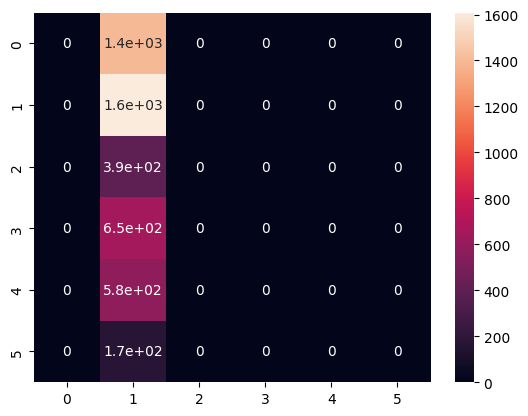

In [50]:
# classification report for LSTM
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

# confusion matrix for LSTM
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


# plot the confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [51]:
from keras.models import load_model
model.save('LSTM.h5')

In [52]:
ls_ac = 0.3200

In [53]:
ls_ac

0.32

# **Accuracy graph**

In [54]:
graph = pd.DataFrame({'Modules':['DecisionTreeClassifier','RandomForestClassifier','LSTM'],
                    'Accurecy':[ac*100, acc*100,ls_ac*100]})

In [55]:
graph

Modules  Accurecy
0  DecisionTreeClassifier   63.2000
1  RandomForestClassifier   82.8125
2                    LSTM   32.0000

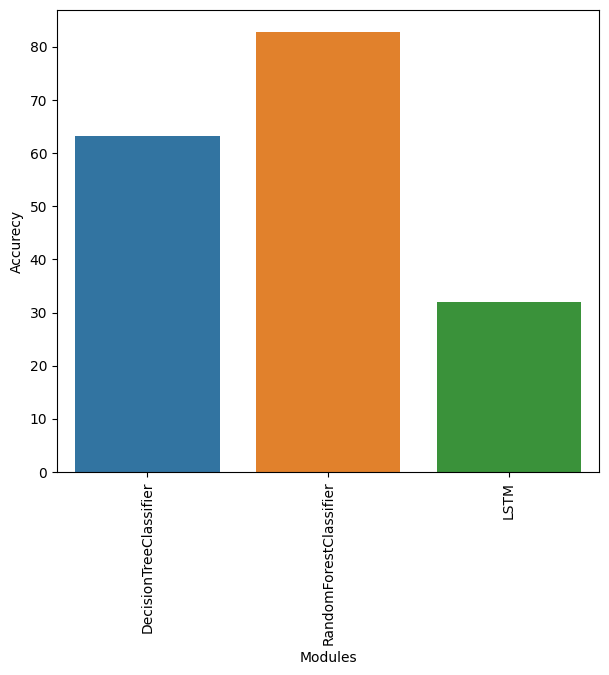

In [56]:
plt.figure(figsize=(7,6))
sns.barplot(y=graph.Accurecy,x=graph.Modules)
plt.xticks(rotation='vertical')
plt.show()

# **Prediction**

In [57]:
df.head()

text  label  \
0                            i didnt feel humiliated      0   
1  i can go from feeling so hopeless to so damned...      0   
2   im grabbing a minute to post i feel greedy wrong      3   
3  i am ever feeling nostalgic about the fireplac...      2   
4                               i am feeling grouchy      3   

                                               clean  
0                                  didnt feel humili  
1  go feel hopeless damn hope around someon care ...  
2               im grab minut post feel greedi wrong  
3     ever feel nostalg fireplac know still properti  
4                                       feel grouchi

In [70]:
inn = ['feel grouchi']

In [71]:
res = hvectorizer.fit_transform(inn).toarray()

In [72]:
out = ren.predict(res)

In [73]:
out

array([3], dtype=int64)

In [74]:
df['label'].value_counts()

1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: label, dtype: int64